In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [6]:
dataset = pd.read_csv('Classified Data', index_col=0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [8]:
dataset.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [9]:
dataset['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [10]:
# split the data into x and y
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [11]:
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [12]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [14]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(750, 10) (250, 10) (750,) (250,)


# Building KNN Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(x_train, y_train)
#y_pred = knn.predict(x_test)
#print(y_test)
#print("****************"*10)
#print(y_pred)

# Select the best K value to decide "n_neighbors" basis error_rate

In [24]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

In [18]:
error_rate

[0.076,
 0.084,
 0.06,
 0.064,
 0.064,
 0.06,
 0.048,
 0.048,
 0.044,
 0.044,
 0.048,
 0.044,
 0.044,
 0.04,
 0.04,
 0.04,
 0.04,
 0.044,
 0.044,
 0.048,
 0.044,
 0.056,
 0.044,
 0.048,
 0.044,
 0.044,
 0.036,
 0.036,
 0.036]

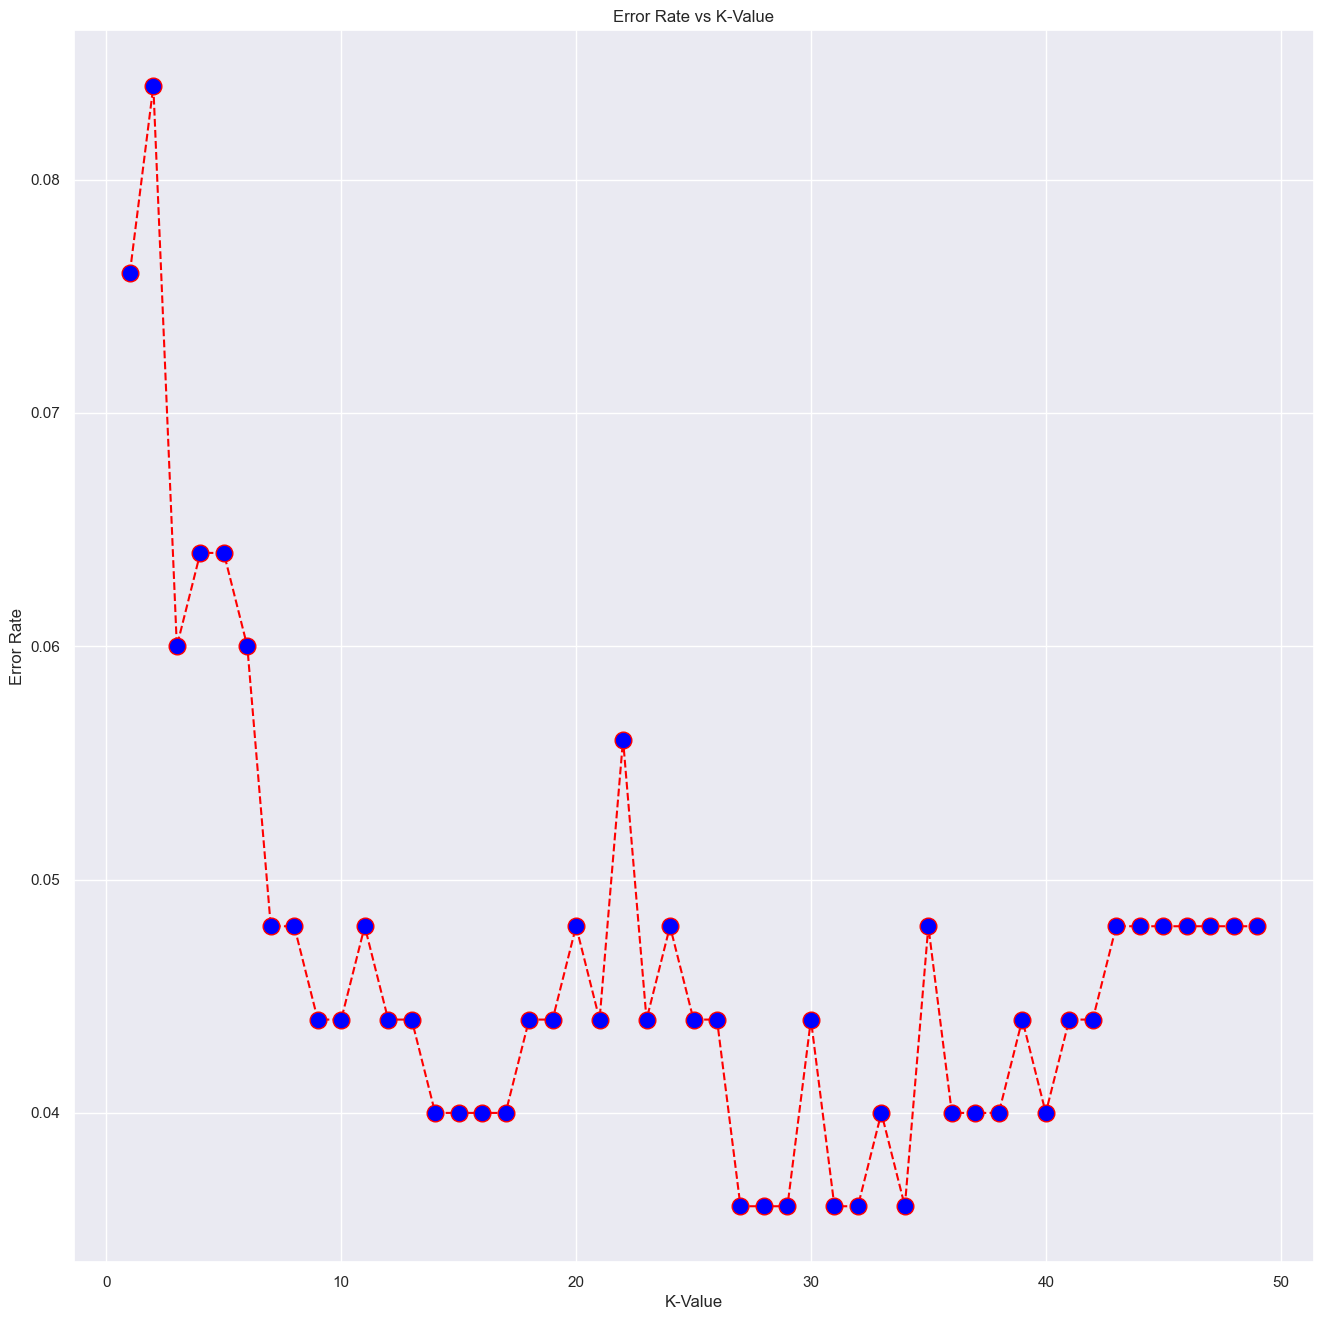

In [25]:
plt.figure(figsize=(16,16))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [27]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [28]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
print(confusion_matrix(y_train, y_pred_train))
print("*****************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[334  32]
 [ 12 372]]
**************************************************************************************************************************************************************************
[[129   5]
 [  4 112]]


In [30]:
print(classification_report(y_train, y_pred_train))
print("*****************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       366
           1       0.92      0.97      0.94       384

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

**************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       134
           1       0.96      0.97      0.96       116

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [31]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("*****************"*10)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.9413333333333334
**************************************************************************************************************************************************************************
Test Accuracy : 0.964


# cross validation 

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
training_accuracy = cross_val_score(knn, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, x_test, y_test, cv=10)
print(training_accuracy)
print("Training Avg Accuracy :",training_accuracy.mean())
print("Training Max Accuracy :",training_accuracy.max())
print("*******************"*10)
print(test_accuracy)
print("Test Avg Accuracy :",test_accuracy.mean())
print("Test Max Accuracy :",test_accuracy.max())

[0.92       0.97333333 0.93333333 0.88       0.89333333 0.88
 0.94666667 0.97333333 0.89333333 0.96      ]
Training Avg Accuracy : 0.9253333333333333
Training Max Accuracy : 0.9733333333333334
**********************************************************************************************************************************************************************************************
[0.92 0.92 0.96 0.92 0.96 0.96 1.   0.96 1.   1.  ]
Test Avg Accuracy : 0.96
Test Max Accuracy : 1.0


# Support Vector Machine 

In [59]:
from sklearn.svm import SVC
from sklearn.svm import SVR

In [35]:
# kernel = 'linear'
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [36]:
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

In [37]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train_linear))
print("*****************"*10)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test_linear))

Training Accuracy : 0.9466666666666667
**************************************************************************************************************************************************************************
Test Accuracy : 0.964


In [56]:
# kernel = 'sigmoid'
svm_sigmoid = SVC(C=0.01)
svm_sigmoid.fit(x_train, y_train)

SVC(C=0.01)

In [57]:
y_pred_train_sigmoid = svm_sigmoid.predict(x_train)
y_pred_test_sigmoid = svm_sigmoid.predict(x_test)

In [58]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train_sigmoid))
print("*****************"*10)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test_sigmoid))

Training Accuracy : 0.936
**************************************************************************************************************************************************************************
Test Accuracy : 0.96


In [41]:
# kernel = 'poly'
svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [42]:
y_pred_train_poly = svm_poly.predict(x_train)
y_pred_test_poly = svm_poly.predict(x_test)

In [43]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train_poly))
print("*****************"*10)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test_poly))

Training Accuracy : 0.9653333333333334
**************************************************************************************************************************************************************************
Test Accuracy : 0.928


In [44]:
# kernel = 'rbf'
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

SVC()

In [45]:
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

In [46]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train_rbf))
print("*****************"*10)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test_rbf))

Training Accuracy : 0.96
**************************************************************************************************************************************************************************
Test Accuracy : 0.96
